# Matplotlib tutorial
Also usefull: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Read in mean temperatures per day of 2015

In [2]:
df = pd.read_csv("./data/dwd_temp_days_2015.csv", index_col="time")
df.head()

,temperature
time,
2015-01-01,1.060417
2015-01-02,4.643229
2015-01-03,2.091667
2015-01-04,2.521875
2015-01-05,1.021354


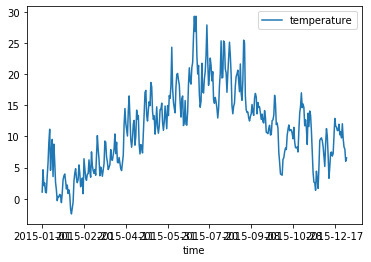

In [3]:
df.plot()

In [4]:
type(df.index)

pandas.core.indexes.base.Index

## Datetime index
Due to the unformatted index, the x-axis looks very chaotic.  
We can solve this by changing the index to a datetime format.

In [5]:
df.index = pd.to_datetime(df.index)
df.head()

,temperature
time,
2015-01-01,1.060417
2015-01-02,4.643229
2015-01-03,2.091667
2015-01-04,2.521875
2015-01-05,1.021354


In [6]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

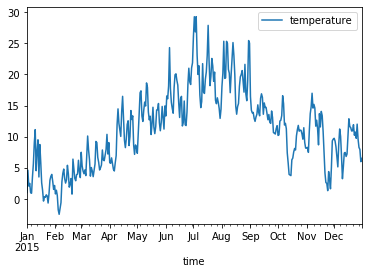

In [7]:
df.plot()

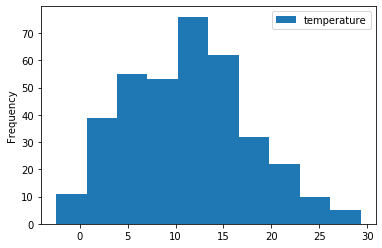

In [8]:
df.plot(kind="hist")

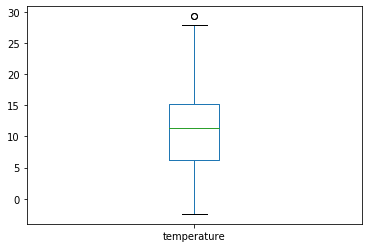

In [9]:
df.plot(kind="box")

In [10]:
print("Temperature \nMean: {0} \nMin: {1} \nMax: {2}".format(df.temperature.mean(), 
                                                                df.temperature.min(), 
                                                                df.temperature.max()
                                                               ))

Temperature 
Mean: 11.221301369863014 
Min: -2.444270833333333 
Max: 29.286458333333343


### Other kinds of plots:

- ‘line’ : line plot (default)

- ‘bar’ : vertical bar plot

- ‘barh’ : horizontal bar plot

- ‘hist’ : histogram

- ‘box’ : boxplot

- ‘kde’ : Kernel Density Estimation plot

- ‘density’ : same as ‘kde’

- ‘area’ : area plot

- ‘pie’ : pie plot

- ‘scatter’ : scatter plot

- ‘hexbin’ : hexbin plot.



## Modifying the plot

### Change the size of the plot

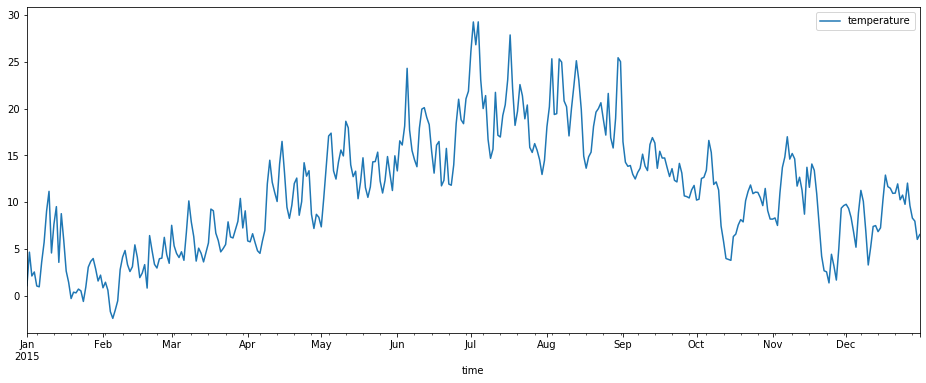

In [11]:
df.plot(figsize = (16,6))

### Use predefined styles

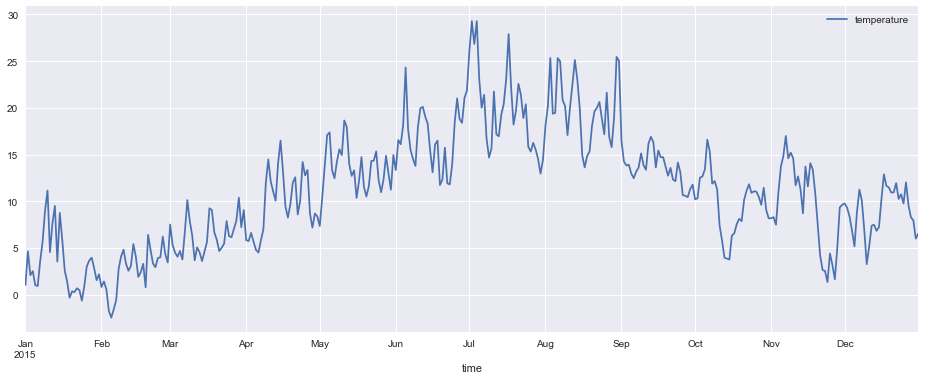

In [16]:
plt.style.use('seaborn')

df.plot(figsize = (16,6))

### If a syle has been chosen once it will stay for the whole file

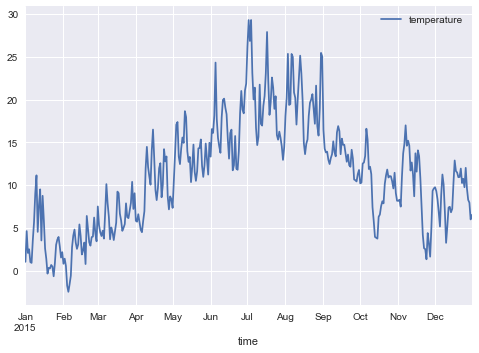

In [13]:
df.plot()

### Choose from a number of different styles

In [14]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


### Add Title

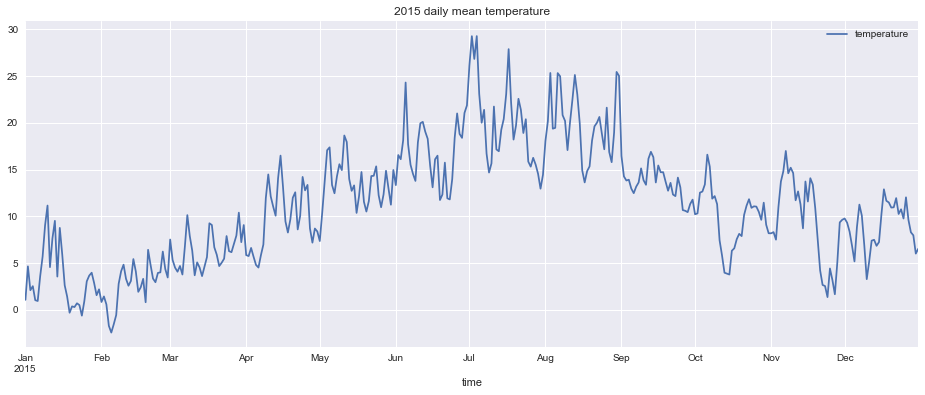

In [17]:
df.plot(figsize = (16,6), title = "2015 daily mean temperature")

### Change the font size of title and labels

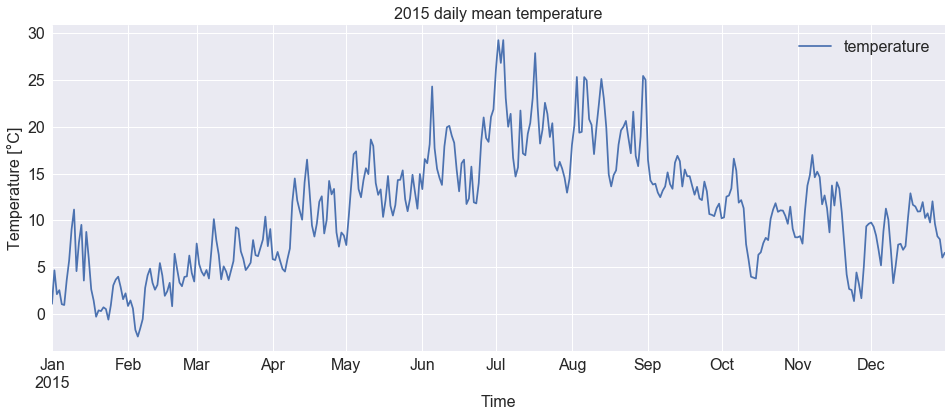

In [18]:
fontsize = 16

df.plot(figsize = (16,6))

plt.title("2015 daily mean temperature", fontsize= fontsize)

plt.ylabel("Temperature [°C]", fontsize= fontsize)
plt.xlabel("Time", fontsize= fontsize)

plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)

plt.legend(fontsize=fontsize)

## Object-oriented API  
https://matplotlib.org/3.1.1/api/index.html#the-object-oriented-api

### Change the title and label the axis


[Text(0, 0.5, 'Temperature [°C]'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, '2015 daily mean temperature')]

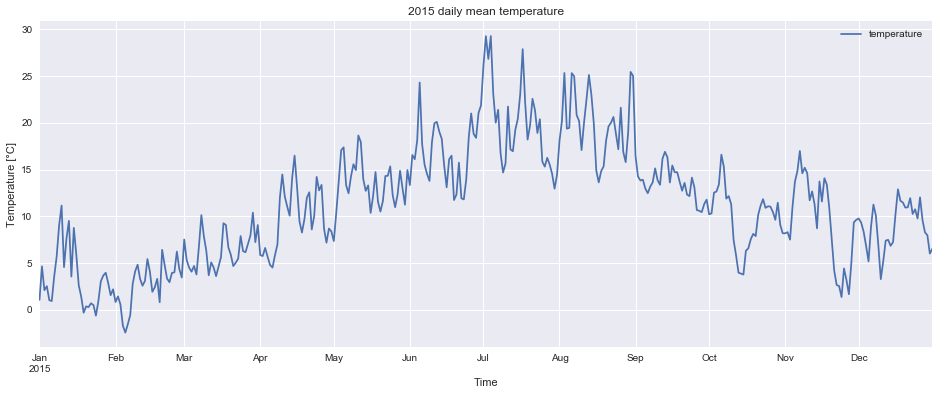

In [19]:
fig, ax1 = plt.subplots(figsize = (16,6))

df.plot(ax = ax1)

ax1.set(xlabel = "Time", 
        ylabel = "Temperature [°C]",
        title = "2015 daily mean temperature")

### Get two axes in one figure  

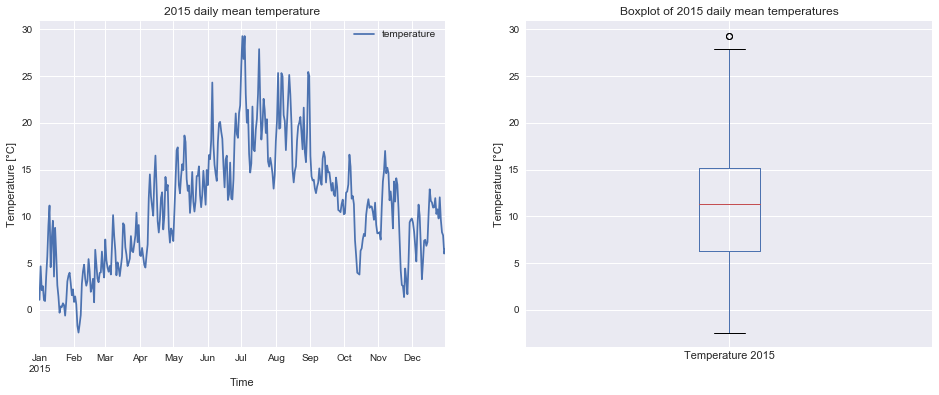

In [20]:
fontsize = 20

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = (16,6))

df.plot(ax = ax1)
df.plot(ax = ax2, kind="box")

ax1.set(xlabel = "Time", 
        ylabel = "Temperature [°C]",
        title = "2015 daily mean temperature")

ax2.set(xlabel = "Temperature 2015", 
        ylabel = "Temperature [°C]",
        title = "Boxplot of 2015 daily mean temperatures")

ax2.tick_params(labelbottom=False)

### Get rid of unnecessary white space and change the font size

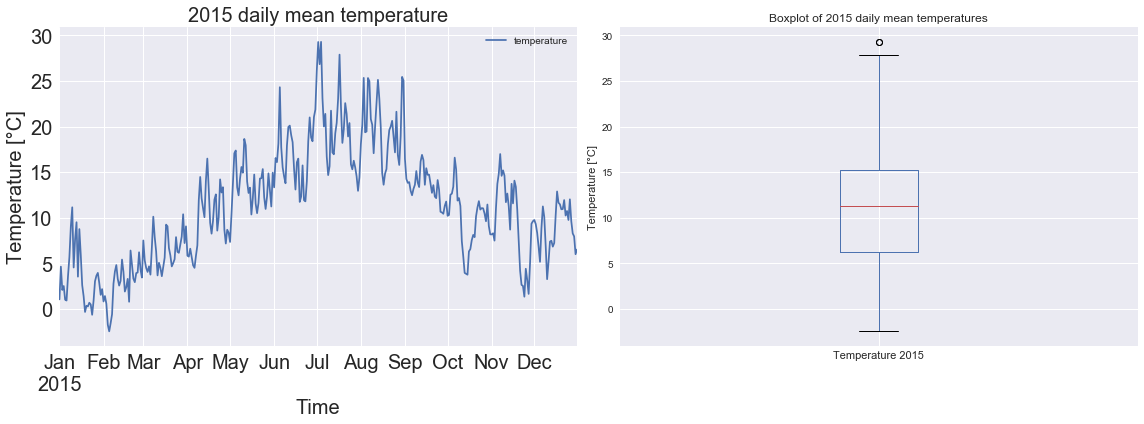

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = (16,6))

df.plot(ax = ax1)
df.plot(ax = ax2, kind="box")

ax1.set_xlabel("Time", fontsize=fontsize)
ax1.set_ylabel("Temperature [°C]", fontsize=fontsize)
ax1.set_title("2015 daily mean temperature", fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)

ax2.set(xlabel = "Temperature 2015", 
        ylabel = "Temperature [°C]",
        title = "Boxplot of 2015 daily mean temperatures")

ax2.tick_params(labelbottom=False)

fig.tight_layout()

### Plot two graphs in the same axes

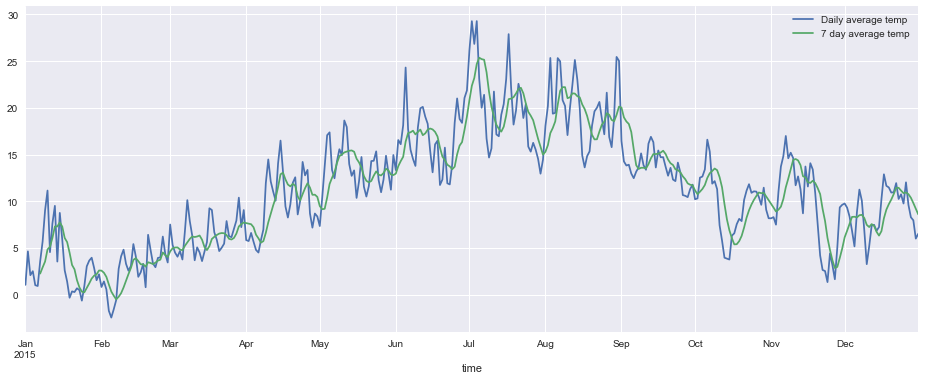

In [24]:
ax1 = plt.subplot()

df.plot(figsize = (16,6), ax = ax1)
df.rolling(7).mean().plot(figsize = (16,6), ax = ax1)

ax1.legend(labels= ["Daily average temp", "7 day average temp"])